# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('master_dataset.csv')

In [3]:
data.head()

,School_code,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,...,Operational_directorate_office_address,FACS_district,Local_health_district,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Date_extracted
0,1138,49127.0,Barnsley Public School,Cliffbrook St,Barnsley,2278.0,4953 2976,barnsley-p.school@det.nsw.edu.au,https://barnsley-p.schools.nsw.gov.au,4953 3094,...,"40-44 Coral Cr, Gateshead West 2290",Hunter New England & Central Coast,Hunter New England,Hunter,Major Cities of Australia,-32.933094,151.594552,Hunter/Central Coast,Newcastle and Lake Macquarie,2023-10-05
1,1139,50460.0,Barooga Public School,Hughes St,Barooga,3644.0,03 5873 4242,barooga-p.school@det.nsw.edu.au,https://barooga-p.schools.nsw.gov.au,03 5873 4700,...,"521 Macauley St, Albury 2640","Murrumbidgee, Far West & Western NSW",Murrumbidgee,Riverina 2,Inner Regional Australia,-35.912963,145.695985,Southern NSW,Murray,2023-10-05
2,1140,49371.0,Barraba Central School,29 Gotha Street,BARRABA,2347.0,6782 1104,barraba-c.school@det.nsw.edu.au,https://barraba-c.schools.nsw.gov.au,6782 1231,...,"66-68 Frome St, Moree 2400",Hunter New England & Central Coast,Hunter New England,North Western 2,Outer Regional Australia,-30.382390,150.599478,North Western NSW,New England and North West,2023-10-05
3,1143,49523.0,Barrington Public School,1 Kenmore St,Barrington,2422.0,6558 4258,barrington-p.school@det.nsw.edu.au,https://barrington-p.schools.nsw.gov.au,6558 4216,...,"Middle St, Forster 2428",Hunter New England & Central Coast,Hunter New England,Manning,Outer Regional Australia,-31.971159,151.911058,North Coast,Mid North Coast,2023-10-05
4,1146,49683.0,Baryulgil Public School,7135 Clarence Way,Baryulgil,2460.0,6647 2124,baryulgil-p.school@det.nsw.edu.au,https://baryulgil-p.schools.nsw.gov.au,6647 2151,...,"97 Mary St, Grafton 2460",Mid North Coast & Northern NSW,Northern NSW,Upper North Coast,Outer Regional Australia,-29.223500,152.605615,North Coast,Coffs Harbour - Grafton,2023-10-05


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   School_code                             2216 non-null   int64  
 1   AgeID                                   2214 non-null   float64
 2   School_name                             2216 non-null   object 
 3   Street                                  2216 non-null   object 
 4   Town_suburb                             2209 non-null   object 
 5   Postcode                                2215 non-null   float64
 6   Phone                                   2216 non-null   object 
 7   School_Email                            2215 non-null   object 
 8   Website                                 2216 non-null   object 
 9   Fax                                     2113 non-null   object 
 10  latest_year_enrolment_FTE               2166 non-null   floa

In [5]:
data.describe()

,School_code,AgeID,Postcode,latest_year_enrolment_FTE,ICSEA_value,Support_classes,Latitude,Longitude
count,2216.000000,2214.000000,2215.000000,2166.000000,2157.000000,0.0,2216.000000,2216.000000
mean,4290.359206,50556.756549,2416.827088,365.111588,979.490032,NaN,-33.185428,150.620679
std,2349.901554,7825.343475,247.514983,323.158491,95.388613,NaN,1.733418,1.837396
min,1001.000000,6354.000000,2000.000000,2.000000,586.000000,NaN,-37.084209,141.439970
25%,2409.750000,48156.250000,2204.000000,101.250000,922.000000,NaN,-33.979356,150.589743
50%,3956.500000,49675.500000,2420.000000,293.000000,974.000000,NaN,-33.766117,150.992114
75%,5558.250000,50810.250000,2590.000000,532.000000,1043.000000,NaN,-32.810491,151.312040
max,8924.000000,88561.000000,4383.000000,2079.000000,1225.000000,NaN,-28.169510,159.069032


In [6]:
data = data.drop('Support_classes', axis=1) # it has no value in this column

In [7]:
data = data[~data.isin(["np"]).any(axis=1)] # remove all rows that contain np

In [8]:
new_data = data.dropna() # drop all rows with na

In [9]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 2206
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   School_code                             1385 non-null   int64  
 1   AgeID                                   1385 non-null   float64
 2   School_name                             1385 non-null   object 
 3   Street                                  1385 non-null   object 
 4   Town_suburb                             1385 non-null   object 
 5   Postcode                                1385 non-null   float64
 6   Phone                                   1385 non-null   object 
 7   School_Email                            1385 non-null   object 
 8   Website                                 1385 non-null   object 
 9   Fax                                     1385 non-null   object 
 10  latest_year_enrolment_FTE               1385 non-null   floa

In [10]:
new_data.head()

,School_code,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,...,Operational_directorate_office_address,FACS_district,Local_health_district,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Date_extracted
0,1138,49127.0,Barnsley Public School,Cliffbrook St,Barnsley,2278.0,4953 2976,barnsley-p.school@det.nsw.edu.au,https://barnsley-p.schools.nsw.gov.au,4953 3094,...,"40-44 Coral Cr, Gateshead West 2290",Hunter New England & Central Coast,Hunter New England,Hunter,Major Cities of Australia,-32.933094,151.594552,Hunter/Central Coast,Newcastle and Lake Macquarie,2023-10-05
3,1143,49523.0,Barrington Public School,1 Kenmore St,Barrington,2422.0,6558 4258,barrington-p.school@det.nsw.edu.au,https://barrington-p.schools.nsw.gov.au,6558 4216,...,"Middle St, Forster 2428",Hunter New England & Central Coast,Hunter New England,Manning,Outer Regional Australia,-31.971159,151.911058,North Coast,Mid North Coast,2023-10-05
6,1149,50056.0,Batemans Bay Public School,Mundarra Way,Surfside,2536.0,4472 4059,batemansba-p.school@det.nsw.edu.au,https://batemansba-p.schools.nsw.gov.au,4472 8457,...,"15A Citi Centre, Orient St, Batemans Bay",Illawarra Shoalhaven & Southern NSW,Southern NSW,Lower South Coast,Inner Regional Australia,-35.700051,150.188373,Southern NSW,Capital Region,2023-10-05
7,1150,50975.0,Bathurst Public School,George St,Bathurst,2795.0,6331 3923,bathurst-p.school@det.nsw.edu.au,https://bathurst-p.schools.nsw.gov.au,6332 2305,...,"Cnr George and Rocket St, Bathurst 2795","Murrumbidgee, Far West & Western NSW",Western NSW,Western 1,Inner Regional Australia,-33.420942,149.570615,North Western NSW,Central West,2023-10-05
12,1167,50539.0,Beelbangera Public School,Rankins Springs Rd,Beelbangera,2680.0,6963 5368,beelbanger-p.school@det.nsw.edu.au,https://beelbanger-p.schools.nsw.gov.au,6963 5506,...,"Government Offices, 104-110 Banna Ave, Griffit...","Murrumbidgee, Far West & Western NSW",Murrumbidgee,Riverina 1,Outer Regional Australia,-34.252836,146.101067,Southern NSW,Riverina,2023-10-05


# Target Variable : Opportunity_class

##### Create new data frame for preprocessing

In [11]:
data_for_preprocessing = new_data[['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 
                                   'Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 
                                   'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 
                                   'Late_opening_school', 'ASGS_remoteness', 'Latitude', 'Longitude', 
                                   'Opportunity_class']].copy()

##### Reset index

In [12]:
data_for_preprocessing.reset_index(drop=True, inplace=True)
data_for_preprocessing.head()

,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Level_of_schooling,Selective_school,School_specialty_type,School_subtype,Preschool_ind,Distance_education,Intensive_english_centre,School_gender,Late_opening_school,ASGS_remoteness,Latitude,Longitude,Opportunity_class
0,295.0,13.0,3.0,948.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Major Cities of Australia,-32.933094,151.594552,N
1,48.0,17.0,0.0,978.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Outer Regional Australia,-31.971159,151.911058,N
2,524.0,28.0,6.0,905.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,Y,N,N,Coed,N,Inner Regional Australia,-35.700051,150.188373,N
3,477.0,12.0,14.0,999.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Inner Regional Australia,-33.420942,149.570615,N
4,162.0,4.0,29.0,1001.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Outer Regional Australia,-34.252836,146.101067,N


In [13]:
data_for_preprocessing.shape

(1385, 17)

##### Create data frame for dummies

In [14]:
data_drop_for_dummies = data_for_preprocessing.drop(['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Opportunity_class'], axis=1)

In [15]:
data_drop_for_dummies

,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Latitude,Longitude
0,295.0,13.0,3.0,948.0,-32.933094,151.594552
1,48.0,17.0,0.0,978.0,-31.971159,151.911058
2,524.0,28.0,6.0,905.0,-35.700051,150.188373
3,477.0,12.0,14.0,999.0,-33.420942,149.570615
4,162.0,4.0,29.0,1001.0,-34.252836,146.101067
...,...,...,...,...,...,...
1380,638.2,14.0,10.0,928.0,-34.559745,150.834080
1381,568.0,11.0,38.0,952.0,-33.678883,150.875744
1382,1088.4,6.0,56.0,954.0,-33.770841,150.838148
1383,927.5,15.0,5.0,951.0,-33.008794,151.582022


In [16]:
categorical_columns = ['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness']
dummies = pd.get_dummies(data_for_preprocessing, columns=categorical_columns)

In [17]:
dummies = dummies.drop(['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Latitude', 'Longitude', 'Opportunity_class'], axis=1)

In [18]:
X = pd.concat([data_drop_for_dummies, dummies], axis=1)
y = data_for_preprocessing['Opportunity_class']

In [19]:
y = y.replace({'Y': 1, 'N': 0})

In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1380    0
1381    0
1382    0
1383    0
1384    0
Name: Opportunity_class, Length: 1385, dtype: int64

In [21]:
X['Indigenous_pct'] = X['Indigenous_pct'].astype(float)
X['LBOTE_pct'] = X['LBOTE_pct'].astype(float)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   latest_year_enrolment_FTE                         1385 non-null   float64
 1   Indigenous_pct                                    1385 non-null   float64
 2   LBOTE_pct                                         1385 non-null   float64
 3   ICSEA_value                                       1385 non-null   float64
 4   Latitude                                          1385 non-null   float64
 5   Longitude                                         1385 non-null   float64
 6   Level_of_schooling_Central/Community School       1385 non-null   uint8  
 7   Level_of_schooling_Infants School                 1385 non-null   uint8  
 8   Level_of_schooling_Primary School                 1385 non-null   uint8  
 9   Level_of_schooling_

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network

In [25]:
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {loss*100}")
print(f"Test Accuracy: {accuracy*100}")

Epoch 1/10
35/35 [==============================] - 3s 23ms/step - loss: 0.6767 - accuracy: 0.6968 - val_loss: 0.3623 - val_accuracy: 0.9314
Epoch 2/10
35/35 [==============================] - 0s 10ms/step - loss: 0.2182 - accuracy: 0.9612 - val_loss: 0.2467 - val_accuracy: 0.9422
Epoch 3/10
35/35 [==============================] - 0s 9ms/step - loss: 0.1624 - accuracy: 0.9612 - val_loss: 0.2340 - val_accuracy: 0.9422
Epoch 4/10
35/35 [==============================] - 0s 9ms/step - loss: 0.1520 - accuracy: 0.9612 - val_loss: 0.2225 - val_accuracy: 0.9422
Epoch 5/10
35/35 [==============================] - 0s 10ms/step - loss: 0.1452 - accuracy: 0.9612 - val_loss: 0.2144 - val_accuracy: 0.9422
Epoch 6/10
35/35 [==============================] - 0s 9ms/step - loss: 0.1406 - accuracy: 0.9612 - val_loss: 0.2089 - val_accuracy: 0.9422
Epoch 7/10
35/35 [==============================] - 0s 8ms/step - loss: 0.1377 - accuracy: 0.9612 - val_loss: 0.2033 - val_accuracy: 0.9422
Epoch 8/10
35/35 

In [26]:
y_pred = model1.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

confusion = confusion_matrix(y_test, y_pred_binary)

tn, fp, fn, tp = confusion.ravel()

print(confusion)

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

9/9 [==============================] - 0s 4ms/step
[[261   0]
 [ 16   0]]
True Negatives: 261
False Positives: 0
False Negatives: 16
True Positives: 0


In [27]:
y_pred = model1.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy*100}")

precision = precision_score(y_test, y_pred_binary)
print(f"Precision: {precision*100}")

recall = recall_score(y_test, y_pred_binary)
print(f"Recall: {recall*100}")

f1 = f1_score(y_test, y_pred_binary)
print(f"F1-score: {f1*100}")

9/9 [==============================] - 0s 5ms/step
Accuracy: 94.22382671480143
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Target Variable : Late_opening_school

In [28]:
data_for_preprocessing = new_data[['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Latitude', 'Longitude', 'Opportunity_class']].copy()

In [29]:
data_for_preprocessing.reset_index(drop=True, inplace=True)
data_for_preprocessing.head()

,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Level_of_schooling,Selective_school,School_specialty_type,School_subtype,Preschool_ind,Distance_education,Intensive_english_centre,School_gender,Late_opening_school,ASGS_remoteness,Latitude,Longitude,Opportunity_class
0,295.0,13.0,3.0,948.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Major Cities of Australia,-32.933094,151.594552,N
1,48.0,17.0,0.0,978.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Outer Regional Australia,-31.971159,151.911058,N
2,524.0,28.0,6.0,905.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,Y,N,N,Coed,N,Inner Regional Australia,-35.700051,150.188373,N
3,477.0,12.0,14.0,999.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Inner Regional Australia,-33.420942,149.570615,N
4,162.0,4.0,29.0,1001.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Outer Regional Australia,-34.252836,146.101067,N


In [30]:
data_for_preprocessing.shape

(1385, 17)

In [31]:
data_drop_for_dummies = data_for_preprocessing.drop(['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Opportunity_class'], axis=1)

In [32]:
categorical_columns = ['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Opportunity_class', 'ASGS_remoteness']
dummies = pd.get_dummies(data_for_preprocessing, columns=categorical_columns)

In [33]:
dummies = dummies.drop(['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Latitude', 'Longitude', 'Late_opening_school'], axis=1)

In [34]:
X = pd.concat([data_drop_for_dummies, dummies], axis=1)
y = data_for_preprocessing['Late_opening_school']

In [35]:
y = y.replace({'Y': 1, 'N': 0})

In [36]:
X['Indigenous_pct'] = X['Indigenous_pct'].astype(float)
X['LBOTE_pct'] = X['LBOTE_pct'].astype(float)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   latest_year_enrolment_FTE                         1385 non-null   float64
 1   Indigenous_pct                                    1385 non-null   float64
 2   LBOTE_pct                                         1385 non-null   float64
 3   ICSEA_value                                       1385 non-null   float64
 4   Latitude                                          1385 non-null   float64
 5   Longitude                                         1385 non-null   float64
 6   Level_of_schooling_Central/Community School       1385 non-null   uint8  
 7   Level_of_schooling_Infants School                 1385 non-null   uint8  
 8   Level_of_schooling_Primary School                 1385 non-null   uint8  
 9   Level_of_schooling_

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

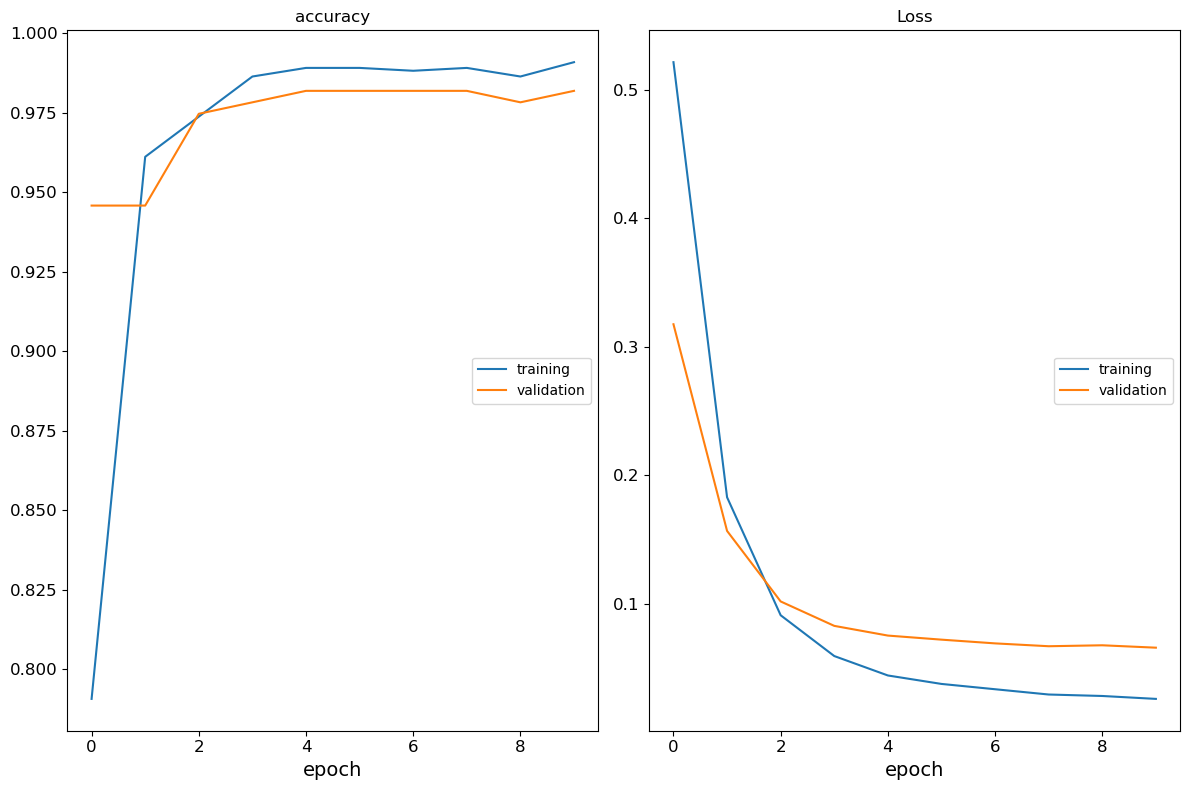

accuracy
	training         	 (min:    0.791, max:    0.991, cur:    0.991)
	validation       	 (min:    0.946, max:    0.982, cur:    0.982)
Loss
	training         	 (min:    0.026, max:    0.522, cur:    0.026)
	validation       	 (min:    0.066, max:    0.318, cur:    0.066)
9/9 [==============================] - 0s 6ms/step - loss: 0.0657 - accuracy: 0.9819
Test Loss: 6.569243222475052
Test Accuracy: 98.19494485855103


In [40]:
from IPython.display import SVG
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[plot_losses], validation_data=(X_test, y_test))

loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test Loss: {loss*100}")
print(f"Test Accuracy: {accuracy*100}")

In [41]:
y_pred = model2.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

confusion = confusion_matrix(y_test, y_pred_binary)

tn, fp, fn, tp = confusion.ravel()

print(confusion)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

9/9 [==============================] - 0s 4ms/step
[[261   1]
 [  4  11]]
True Negatives (TN): 261
False Positives (FP): 1
False Negatives (FN): 4
True Positives (TP): 11


In [42]:
y_pred = model2.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy*100}")

precision = precision_score(y_test, y_pred_binary)
print(f"Precision: {precision*100}")

recall = recall_score(y_test, y_pred_binary)
print(f"Recall: {recall*100}")

f1 = f1_score(y_test, y_pred_binary)
print(f"F1-score: {f1*100}")

9/9 [==============================] - 0s 4ms/step
Accuracy: 98.19494584837545
Precision: 91.66666666666666
Recall: 73.33333333333333
F1-score: 81.48148148148148


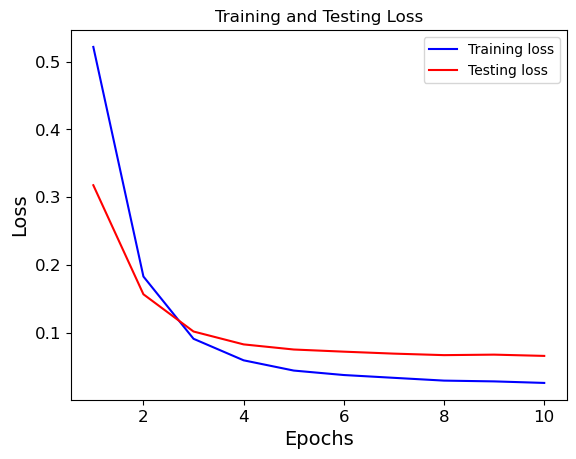

In [43]:
training_loss = history.history['loss']
testing_loss = history.history['val_loss']  # Assuming you have validation data

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training loss')
plt.plot(epochs, testing_loss, 'r', label='Testing loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Support Vector Machine

In [44]:
data = pd.read_csv("master_dataset.csv")
data.head(10)

,School_code,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,...,Operational_directorate_office_address,FACS_district,Local_health_district,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Date_extracted
0,1138,49127.0,Barnsley Public School,Cliffbrook St,Barnsley,2278.0,4953 2976,barnsley-p.school@det.nsw.edu.au,https://barnsley-p.schools.nsw.gov.au,4953 3094,...,"40-44 Coral Cr, Gateshead West 2290",Hunter New England & Central Coast,Hunter New England,Hunter,Major Cities of Australia,-32.933094,151.594552,Hunter/Central Coast,Newcastle and Lake Macquarie,2023-10-05
1,1139,50460.0,Barooga Public School,Hughes St,Barooga,3644.0,03 5873 4242,barooga-p.school@det.nsw.edu.au,https://barooga-p.schools.nsw.gov.au,03 5873 4700,...,"521 Macauley St, Albury 2640","Murrumbidgee, Far West & Western NSW",Murrumbidgee,Riverina 2,Inner Regional Australia,-35.912963,145.695985,Southern NSW,Murray,2023-10-05
2,1140,49371.0,Barraba Central School,29 Gotha Street,BARRABA,2347.0,6782 1104,barraba-c.school@det.nsw.edu.au,https://barraba-c.schools.nsw.gov.au,6782 1231,...,"66-68 Frome St, Moree 2400",Hunter New England & Central Coast,Hunter New England,North Western 2,Outer Regional Australia,-30.382390,150.599478,North Western NSW,New England and North West,2023-10-05
3,1143,49523.0,Barrington Public School,1 Kenmore St,Barrington,2422.0,6558 4258,barrington-p.school@det.nsw.edu.au,https://barrington-p.schools.nsw.gov.au,6558 4216,...,"Middle St, Forster 2428",Hunter New England & Central Coast,Hunter New England,Manning,Outer Regional Australia,-31.971159,151.911058,North Coast,Mid North Coast,2023-10-05
4,1146,49683.0,Baryulgil Public School,7135 Clarence Way,Baryulgil,2460.0,6647 2124,baryulgil-p.school@det.nsw.edu.au,https://baryulgil-p.schools.nsw.gov.au,6647 2151,...,"97 Mary St, Grafton 2460",Mid North Coast & Northern NSW,Northern NSW,Upper North Coast,Outer Regional Australia,-29.223500,152.605615,North Coast,Coffs Harbour - Grafton,2023-10-05
5,1148,48571.0,Bass Hill Public School,611 Hume Hwy,Bass Hill,2197.0,9644 3431,basshill-p.school@det.nsw.edu.au,https://basshill-p.schools.nsw.gov.au,9644 5271,...,"Union St, Riverwood 2210",South Western Sydney,South Western Sydney,Metropolitan South West,Major Cities of Australia,-33.905902,151.005779,South Western Sydney,Sydney - Inner South West,2023-10-05
6,1149,50056.0,Batemans Bay Public School,Mundarra Way,Surfside,2536.0,4472 4059,batemansba-p.school@det.nsw.edu.au,https://batemansba-p.schools.nsw.gov.au,4472 8457,...,"15A Citi Centre, Orient St, Batemans Bay",Illawarra Shoalhaven & Southern NSW,Southern NSW,Lower South Coast,Inner Regional Australia,-35.700051,150.188373,Southern NSW,Capital Region,2023-10-05
7,1150,50975.0,Bathurst Public School,George St,Bathurst,2795.0,6331 3923,bathurst-p.school@det.nsw.edu.au,https://bathurst-p.schools.nsw.gov.au,6332 2305,...,"Cnr George and Rocket St, Bathurst 2795","Murrumbidgee, Far West & Western NSW",Western NSW,Western 1,Inner Regional Australia,-33.420942,149.570615,North Western NSW,Central West,2023-10-05
8,1152,46415.0,Batlow Technology School,Pioneer St,Batlow,2730.0,6949 1208,batlow-c.school@det.nsw.edu.au,https://batlow-c.schools.nsw.gov.au,6949 1666,...,"Level 4, 76 Morgan St, Wagga Wagga 2650","Murrumbidgee, Far West & Western NSW",Murrumbidgee,Riverina 1,Outer Regional Australia,-35.523007,148.146548,Southern NSW,Riverina,2023-10-05
9,1164,51098.0,Bedgerabong Public School,7 Golding Avenue,BEDGERABONG,2871.0,6857 1185,bedgerebon-p.school@det.nsw.edu.au,https://bedgerebon-p.schools.nsw.gov.au,6857 1118,...,"Government Offices, 104-110 Banna Ave, Griffit...","Murrumbidgee, Far West & Western NSW",Western NSW,Western 1,Outer Regional Australia,-33.361353,147.679318,North Western NSW,Central West,2023-10-05


In [45]:
data = data.drop('Support_classes', axis=1)

In [46]:
new_data = data.dropna()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2206
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   School_code                             2050 non-null   int64  
 1   AgeID                                   2050 non-null   float64
 2   School_name                             2050 non-null   object 
 3   Street                                  2050 non-null   object 
 4   Town_suburb                             2050 non-null   object 
 5   Postcode                                2050 non-null   float64
 6   Phone                                   2050 non-null   object 
 7   School_Email                            2050 non-null   object 
 8   Website                                 2050 non-null   object 
 9   Fax                                     2050 non-null   object 
 10  latest_year_enrolment_FTE               2050 non-null   floa

In [47]:
new_data = new_data[~new_data.isin(["np"]).any(axis=1)]

In [48]:
len(new_data)

1385

In [49]:
label_encoder = LabelEncoder()

In [50]:
label_columns = new_data[['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'ASGS_remoteness', 'Opportunity_class']]
for col in label_columns:
    new_data[col] = label_encoder.fit_transform(new_data[col])

In [51]:
Y = new_data.loc[:,"Late_opening_school"]

In [52]:
Y = Y.replace({'Y': 1, 'N': 0})

In [53]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 2206
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   School_code                             1385 non-null   int64  
 1   AgeID                                   1385 non-null   float64
 2   School_name                             1385 non-null   object 
 3   Street                                  1385 non-null   object 
 4   Town_suburb                             1385 non-null   object 
 5   Postcode                                1385 non-null   float64
 6   Phone                                   1385 non-null   object 
 7   School_Email                            1385 non-null   object 
 8   Website                                 1385 non-null   object 
 9   Fax                                     1385 non-null   object 
 10  latest_year_enrolment_FTE               1385 non-null   floa

In [54]:
X = new_data.loc[:, ["latest_year_enrolment_FTE", "Indigenous_pct", "LBOTE_pct", "ICSEA_value", "Level_of_schooling",
                     "Selective_school","School_subtype", "Latitude", "Longitude", "School_specialty_type", 
                     "Preschool_ind", "Distance_education", "Intensive_english_centre", "School_gender", 
                    "ASGS_remoteness", "Opportunity_class"]]
X
len(X)

1385

In [55]:
columns = X.columns
columns

Index(['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct',
       'ICSEA_value', 'Level_of_schooling', 'Selective_school',
       'School_subtype', 'Latitude', 'Longitude', 'School_specialty_type',
       'Preschool_ind', 'Distance_education', 'Intensive_english_centre',
       'School_gender', 'ASGS_remoteness', 'Opportunity_class'],
      dtype='object')

In [56]:
for col in columns:
    X[col] = pd.to_numeric(X[col], errors='coerce', downcast='integer')

In [57]:
Y = Y.replace({'Y': 1, 'N': 0})
Y.info()
Y

<class 'pandas.core.series.Series'>
Int64Index: 1385 entries, 0 to 2206
Series name: Late_opening_school
Non-Null Count  Dtype
--------------  -----
1385 non-null   int64
dtypes: int64(1)
memory usage: 21.6 KB


0       0
3       0
6       0
7       0
12      0
       ..
2201    0
2202    0
2203    0
2204    0
2206    0
Name: Late_opening_school, Length: 1385, dtype: int64

In [58]:
X['Indigenous_pct'] = X['Indigenous_pct'].astype(int)
X['LBOTE_pct'] = X['LBOTE_pct'].astype(int)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
svm_clf1 = LinearSVC(C=1, loss="hinge")

In [62]:
svm_clf1.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

In [63]:
y_pred = svm_clf1.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[261,   3],
       [  1,  12]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)
precision_linear = precision_score(y_test, y_pred, average='weighted')
print("Precision Score:", precision_linear*100)

98.55595667870037
Precision Score: 98.50862134255635


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 0.01, accuracy = 96.75090252707581
C = 0.1, accuracy = 97.47292418772562
C = 1, accuracy = 98.55595667870037
C = 10, accuracy = 98.91696750902527
C = 100, accuracy = 98.55595667870037


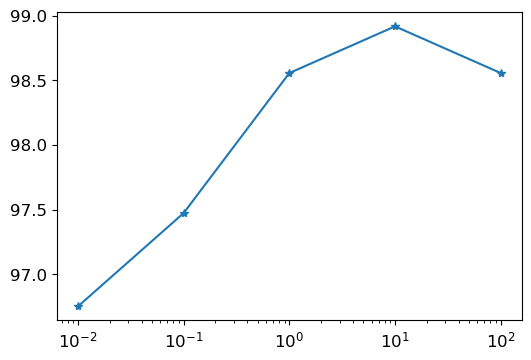

In [65]:
Margins = [0.01, 0.1, 1, 10, 100]
resAccuracy = []
for m in Margins:
    svm_clf_cv = LinearSVC(C=m, loss="hinge")
    svm_clf_cv.fit(X_train,y_train)
    y_pred_cv = svm_clf_cv.predict(X_test)
    accCurr = accuracy_score(y_test, y_pred_cv)*100
    print(f'C = {m}, accuracy = {accCurr}')
    resAccuracy.append(accCurr)
plt.figure(figsize=(6,4))
plt.semilogx(Margins, resAccuracy, '*-')
plt.show()

In [66]:
svm_clf2 = SVC(kernel="rbf", gamma=10, C=1)
svm_clf2.fit(X_train,y_train)

SVC(C=1, gamma=10)

In [67]:
y_pred2 = svm_clf2.predict(X_test)
confusion_matrix(y_pred2, y_test)

array([[262,  15],
       [  0,   0]], dtype=int64)

In [68]:
svm_polynomial = SVC(kernel='poly', degree=3)
svm_polynomial.fit(X_train, y_train)

SVC(kernel='poly')

In [69]:
y_pred3 = svm_polynomial.predict(X_test)
confusion_matrix(y_pred3, y_test)

array([[261,   2],
       [  1,  13]], dtype=int64)

In [70]:
print(accuracy_score(y_test, y_pred3)*100)

98.91696750902527


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=1, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge', random_state=42))])

In [72]:
y_pred4 = polynomial_svm_clf.predict(X_test)
confusion_matrix(y_pred4, y_test)

array([[259,   3],
       [  3,  12]], dtype=int64)

In [73]:
print(accuracy_score(y_test, y_pred4)*100)

97.83393501805054


In [74]:
from sklearn.metrics import precision_score
precision_polynomial = precision_score(y_test, y_pred4, average='weighted')
print("Precision Score:", precision_polynomial)

Precision Score: 0.9783393501805054


In [75]:
from sklearn.model_selection import cross_val_score
svm_model = SVC(kernel='linear', C=1.0)
scores = cross_val_score(svm_model, X_train, y_train, cv = 5, scoring='accuracy')
print(scores)
mean_accuracy = scores.mean()
print("Mean accuracy score: ", mean_accuracy)

[0.97747748 0.9954955  0.9954955  0.99095023 0.99095023]
Mean accuracy score:  0.9900737841914313


# Naive Bayes

In [76]:
#Added Rizwan's code for the pre-processing of Opportunity class

In [77]:
#create new dataframe for pre-processing
data_for_preprocessing = new_data[['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 
                                   'Level_of_schooling', 'Selective_school', 'School_specialty_type', 
                                   'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre',
                                   'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Latitude', 'Longitude',
                                   'Opportunity_class']].copy()

In [78]:
#reset index
data_for_preprocessing.reset_index(drop=True, inplace=True)
data_for_preprocessing.head()

,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Level_of_schooling,Selective_school,School_specialty_type,School_subtype,Preschool_ind,Distance_education,Intensive_english_centre,School_gender,Late_opening_school,ASGS_remoteness,Latitude,Longitude,Opportunity_class
0,295.0,13.0,3.0,948.0,2,1,1,5,0,1,0,1,N,1,-32.933094,151.594552,0
1,48.0,17.0,0.0,978.0,2,1,1,5,0,1,0,1,N,2,-31.971159,151.911058,0
2,524.0,28.0,6.0,905.0,2,1,1,5,1,1,0,1,N,0,-35.700051,150.188373,0
3,477.0,12.0,14.0,999.0,2,1,1,5,0,1,0,1,N,0,-33.420942,149.570615,0
4,162.0,4.0,29.0,1001.0,2,1,1,5,0,1,0,1,N,2,-34.252836,146.101067,0


In [79]:
#create data frame for dummies
data_drop_for_dummies = data_for_preprocessing.drop(['Level_of_schooling','Selective_school', 'School_specialty_type',
                                                     'School_subtype', 'Preschool_ind', 'Distance_education', 
                                                     'Intensive_english_centre','School_gender', 'Late_opening_school',
                                                     'ASGS_remoteness', 'Opportunity_class'], axis=1)

In [80]:
categorical_columns = ['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 
                       'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 
                       'Late_opening_school', 'ASGS_remoteness']
dummies = pd.get_dummies(data_for_preprocessing, columns=categorical_columns)

In [81]:
dummies = dummies.drop(['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Latitude', 
                        'Longitude', 'Opportunity_class'], axis=1)

In [82]:
X = pd.concat([data_drop_for_dummies, dummies], axis=1)
y = data_for_preprocessing['Opportunity_class']

In [83]:
y = y.replace({'Y': 1, 'N': 0})

In [84]:
X['Indigenous_pct'] = X['Indigenous_pct'].astype(float)
X['LBOTE_pct'] = X['LBOTE_pct'].astype(float)

# Naive Bayes for 'Opportunity Class'

In [85]:
#data splitting: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train Dimension: {}".format(X_train.shape))
print("y_train Dimension: {}".format(y_train.shape))
print("X_test Dimension: {}".format(X_test.shape))
print("y_test Dimension: {}".format(y_test.shape))

X_train Dimension: (1108, 55)
y_train Dimension: (1108,)
X_test Dimension: (277, 55)
y_test Dimension: (277,)


In [86]:
#Model Building and Training Data
model_oc = GaussianNB() #classifier
model_oc.fit(X_train, y_train)

GaussianNB()

In [87]:
#accuracy of the training data
model_oc.score(X_train, y_train)

0.3348375451263538

In [88]:
#accuracy of the test data
model_oc.score(X_test, y_test)

0.3935018050541516

In [89]:
#predictions
y_pred_oc = model_oc.predict(X_test)
y_pred_oc

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [90]:
model_oc_acc_score = accuracy_score(y_pred_oc, y_test) #Model Accuracy
f1_score_oc = f1_score(y_pred_oc, y_test, average="weighted") #precision + recall

print("Model Accuracy: ", model_oc_acc_score)
print("Model F1 score: ", f1_score_oc)

Model Accuracy:  0.3935018050541516
Model F1 score:  0.28066533177473024


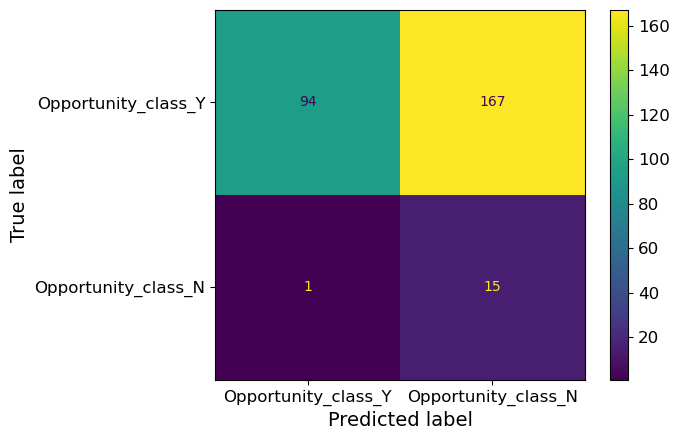

In [91]:
#confusion matrix
labels = ["Opportunity_class_Y", "Opportunity_class_N"]
cm_oc = confusion_matrix(y_test, y_pred_oc)
display = ConfusionMatrixDisplay(confusion_matrix=cm_oc, display_labels=labels)
display.plot();

In [92]:
print(classification_report(y_test, y_pred_oc))

              precision    recall  f1-score   support

           0       0.99      0.36      0.53       261
           1       0.08      0.94      0.15        16

    accuracy                           0.39       277
   macro avg       0.54      0.65      0.34       277
weighted avg       0.94      0.39      0.51       277



In [93]:
#Cross Validation Accuracy of the data set
cross_val_score(GaussianNB(), X_train, y_train, cv=5)

array([0.29279279, 0.38738739, 0.35585586, 0.36199095, 0.36199095])

In [94]:
#ROC Curves
y_pred_prob_oc = model_oc.predict_proba(X_test)
y_pred_prob_oc

array([[1.00000000e+00, 0.00000000e+00],
       [2.89256772e-31, 1.00000000e+00],
       [1.28430135e-41, 1.00000000e+00],
       [3.28852358e-42, 1.00000000e+00],
       [6.51116275e-41, 1.00000000e+00],
       [1.19976728e-41, 1.00000000e+00],
       [1.81860807e-41, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.61199810e-41, 1.00000000e+00],
       [4.30994011e-41, 1.00000000e+00],
       [2.11195672e-41, 1.00000000e+00],
       [1.19899987e-41, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [3.22187821e-39, 1.00000000e+00],
       [3.40417727e-41, 1.00000000e+00],
       [5.57186926e-29, 1.00000000e+00],
       [3.29271510e-41, 1.00000000e+00],
       [1.94751315e-41, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [3.82772315e-41, 1.00000000e+00],
       [3.51433359e-30, 1.00000000e+00],
       [5.50005485e-42, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [4.02048133e-42, 1.00000000e+00],
       [2.859468

In [95]:
# class 'Y' as the positives
probs_oc = y_pred_prob_oc[:,1] 
probs_oc

array([0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 0.99999902, 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.     

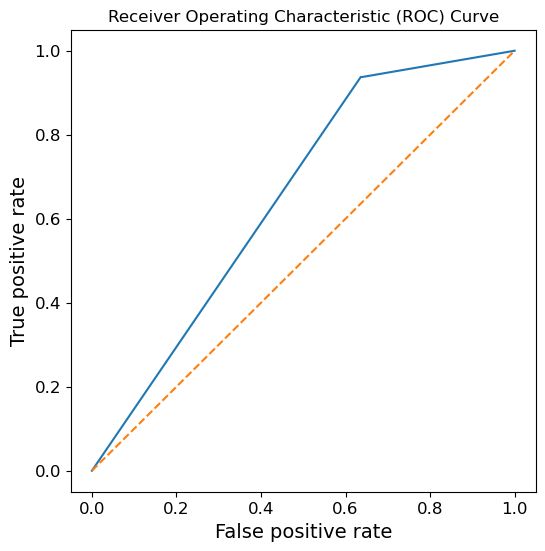

In [96]:
# use the roc_curve class to calculate the necessary values
fper, tper, thresholds = roc_curve(y_test, probs_oc)
# the plotting
plt.figure(figsize=(6,6))
plt.plot(fper, tper)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [97]:
# area under the curve
roc_auc_score(y_test, probs_oc)

0.6506226053639846

# Pre-processing of 'Late_opening_school'

In [98]:
data_for_preprocessing = new_data[['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Latitude', 'Longitude', 'Opportunity_class']].copy()

In [99]:
data_for_preprocessing.reset_index(drop=True, inplace=True)
data_for_preprocessing.head()

,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Level_of_schooling,Selective_school,School_specialty_type,School_subtype,Preschool_ind,Distance_education,Intensive_english_centre,School_gender,Late_opening_school,ASGS_remoteness,Latitude,Longitude,Opportunity_class
0,295.0,13.0,3.0,948.0,2,1,1,5,0,1,0,1,N,1,-32.933094,151.594552,0
1,48.0,17.0,0.0,978.0,2,1,1,5,0,1,0,1,N,2,-31.971159,151.911058,0
2,524.0,28.0,6.0,905.0,2,1,1,5,1,1,0,1,N,0,-35.700051,150.188373,0
3,477.0,12.0,14.0,999.0,2,1,1,5,0,1,0,1,N,0,-33.420942,149.570615,0
4,162.0,4.0,29.0,1001.0,2,1,1,5,0,1,0,1,N,2,-34.252836,146.101067,0


In [100]:
data_drop_for_dummies = data_for_preprocessing.drop(['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Opportunity_class'], axis=1)

In [101]:
categorical_columns = ['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Opportunity_class', 'ASGS_remoteness']
dummies = pd.get_dummies(data_for_preprocessing, columns=categorical_columns)

In [102]:
dummies = dummies.drop(['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Latitude', 'Longitude', 'Late_opening_school'], axis=1)

In [103]:
X = pd.concat([data_drop_for_dummies, dummies], axis=1)
y = data_for_preprocessing['Late_opening_school']

In [104]:
y = y.replace({'Y': 1, 'N': 0})

In [105]:
X['Indigenous_pct'] = X['Indigenous_pct'].astype(float)
X['LBOTE_pct'] = X['LBOTE_pct'].astype(float)

# Naive Bayes: Late_opening_school

In [106]:
#data splitting: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train Dimension: {}".format(X_train.shape))
print("y_train Dimension: {}".format(y_train.shape))
print("X_test Dimension: {}".format(X_test.shape))
print("y_test Dimension: {}".format(y_test.shape))

X_train Dimension: (1108, 55)
y_train Dimension: (1108,)
X_test Dimension: (277, 55)
y_test Dimension: (277,)


In [107]:
#Model Building and Training Data
model_los = GaussianNB()
model_los.fit(X_train, y_train)

GaussianNB()

In [108]:
#accuracy of the training data
model_los.score(X_train, y_train)

0.6732851985559567

In [109]:
#accuracy of the test data
model_los.score(X_test, y_test)

0.7111913357400722

In [110]:
#predictions
y_pred_los = model_los.predict(X_test)
y_pred_los

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [111]:
model_los_acc_score = accuracy_score(y_pred_los, y_test) #Model Accuracy
f1_score_los = f1_score(y_pred_los, y_test, average="weighted") #precision + recall

print("Model Accuracy: ", model_los_acc_score)
print("Model F1 score: ", f1_score_los)

Model Accuracy:  0.7111913357400722
Model F1 score:  0.6321538873869256


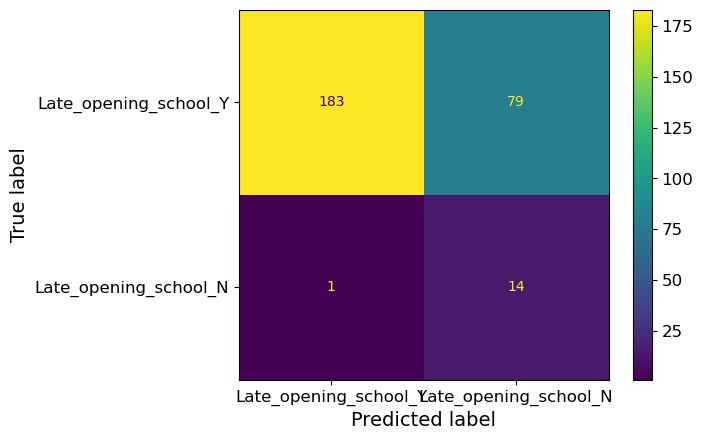

In [112]:
#confusion matrix
labels = ['Late_opening_school_Y', "Late_opening_school_N"]
cm_los = confusion_matrix(y_test, y_pred_los)
display = ConfusionMatrixDisplay(confusion_matrix=cm_los, display_labels=labels)
display.plot();

In [113]:
print(classification_report(y_test, y_pred_los))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       262
           1       0.15      0.93      0.26        15

    accuracy                           0.71       277
   macro avg       0.57      0.82      0.54       277
weighted avg       0.95      0.71      0.79       277



In [114]:
#Cross Validation Accuracy of the data set
cross_val_score(GaussianNB(), X_train, y_train, cv=5)

array([0.68468468, 0.63963964, 0.66216216, 0.66515837, 0.69683258])

In [115]:
#ROC Curves
y_pred_prob_los = model_los.predict_proba(X_test)
y_pred_prob_los

array([[1.00000000e+000, 0.00000000e+000],
       [1.58532882e-023, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [5.74754645e-055, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [3.40640605e-023, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [4.86969378e-025, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [5.69774235e-017, 1.00000000e+000],
       [1.96131574e-025, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.0

In [116]:
# class 'Y' as the positives
probs_los = y_pred_prob_los[:,1] 
probs_los

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.99999922,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.99999982, 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.     

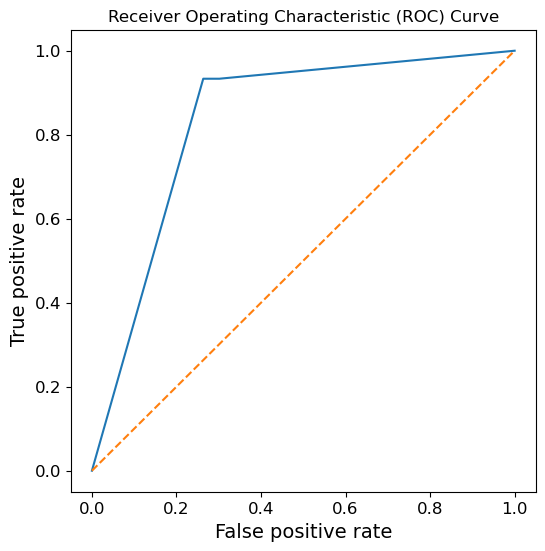

In [117]:
# use the roc_curve class to calculate the necessary values
fper, tper, thresholds = roc_curve(y_test, probs_los)
# the plotting
plt.figure(figsize=(6,6))
plt.plot(fper, tper)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Preprocessing of 'Pre-school_ind'

In [118]:
data_for_preprocessing = new_data[['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Latitude', 'Longitude', 'Opportunity_class']].copy()

In [119]:
data_for_preprocessing.reset_index(drop=True, inplace=True)
data_for_preprocessing.head()

,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Level_of_schooling,Selective_school,School_specialty_type,School_subtype,Preschool_ind,Distance_education,Intensive_english_centre,School_gender,Late_opening_school,ASGS_remoteness,Latitude,Longitude,Opportunity_class
0,295.0,13.0,3.0,948.0,2,1,1,5,0,1,0,1,N,1,-32.933094,151.594552,0
1,48.0,17.0,0.0,978.0,2,1,1,5,0,1,0,1,N,2,-31.971159,151.911058,0
2,524.0,28.0,6.0,905.0,2,1,1,5,1,1,0,1,N,0,-35.700051,150.188373,0
3,477.0,12.0,14.0,999.0,2,1,1,5,0,1,0,1,N,0,-33.420942,149.570615,0
4,162.0,4.0,29.0,1001.0,2,1,1,5,0,1,0,1,N,2,-34.252836,146.101067,0


In [120]:
data_drop_for_dummies = data_for_preprocessing.drop(['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Opportunity_class'], axis=1)

In [121]:
categorical_columns = ['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Late_opening_school' , 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Opportunity_class', 'ASGS_remoteness']

In [122]:
dummies = pd.get_dummies(data_for_preprocessing, columns=categorical_columns)

In [123]:
dummies = dummies.drop(['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Latitude', 'Longitude', 'Preschool_ind'], axis=1)

In [124]:
X = pd.concat([data_drop_for_dummies, dummies], axis=1)
y = data_for_preprocessing['Preschool_ind']

In [125]:
y = y.replace({'Y': 1, 'N': 0})

In [126]:
X['Indigenous_pct'] = X['Indigenous_pct'].astype(float)
X['LBOTE_pct'] = X['LBOTE_pct'].astype(float)

# Naive Bayes for 'Pre-school_ind'

In [127]:
#data splitting: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
#Model Building and Training Data
model_pi = GaussianNB()
model_pi.fit(X_train, y_train)

GaussianNB()

In [129]:
#accuracy of the training data
model_pi.score(X_train, y_train)

0.3267148014440433

In [130]:
#accuracy of the test data
model_pi.score(X_test, y_test)

0.3249097472924188

In [131]:
#predictions
y_pred_pi = model_pi.predict(X_test)
y_pred_pi

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [132]:
model_pi_acc_score = accuracy_score(y_pred_pi, y_test)
f1_score_los = f1_score(y_pred_pi, y_test, average="weighted")

print("Model Accuracy: ", model_pi_acc_score)
print("Model F1 score: ", f1_score_los)

Model Accuracy:  0.3249097472924188
Model F1 score:  0.2084015563945179


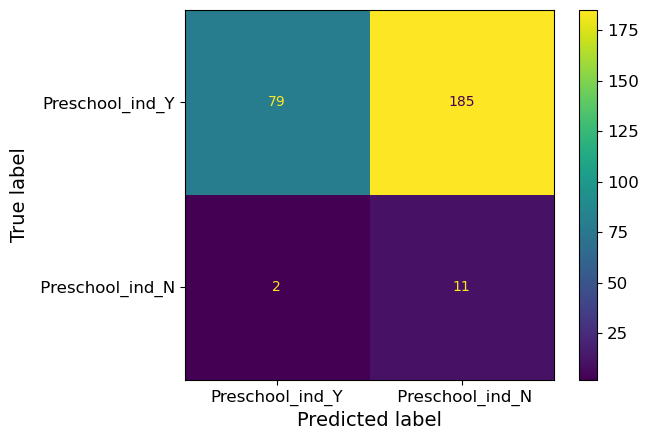

In [133]:
#confusion matrix
labels = ['Preschool_ind_Y', " Preschool_ind_N"]
cm_pi = confusion_matrix(y_test, y_pred_pi)
display = ConfusionMatrixDisplay(confusion_matrix=cm_pi, display_labels=labels)
display.plot();

In [134]:
print(classification_report(y_test, y_pred_pi))

              precision    recall  f1-score   support

           0       0.98      0.30      0.46       264
           1       0.06      0.85      0.11        13

    accuracy                           0.32       277
   macro avg       0.52      0.57      0.28       277
weighted avg       0.93      0.32      0.44       277



In [135]:
#Cross Validation Accuracy of the data set
cross_val_score(GaussianNB(), X_train, y_train, cv=5)

array([0.28828829, 0.30630631, 0.33783784, 0.35294118, 0.34841629])

In [136]:
#ROC Curves
y_pred_prob_pi = model_pi.predict_proba(X_test)
y_pred_prob_pi

array([[1.00000000e+000, 0.00000000e+000],
       [3.19664478e-026, 1.00000000e+000],
       [4.69183890e-030, 1.00000000e+000],
       [1.06205007e-025, 1.00000000e+000],
       [6.95413964e-030, 1.00000000e+000],
       [5.79451770e-030, 1.00000000e+000],
       [4.13650898e-030, 1.00000000e+000],
       [6.13697342e-020, 1.00000000e+000],
       [4.70276961e-030, 1.00000000e+000],
       [2.57097979e-030, 1.00000000e+000],
       [4.01590612e-030, 1.00000000e+000],
       [6.05322596e-030, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [7.55842094e-031, 1.00000000e+000],
       [1.80255085e-030, 1.00000000e+000],
       [3.41614688e-027, 1.00000000e+000],
       [1.74523378e-030, 1.00000000e+000],
       [3.38528700e-030, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [5.05959864e-029, 1.00000000e+000],
       [4.82211381e-027, 1.00000000e+000],
       [2.10140942e-029, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [2.0

In [137]:
# class 'Y' as the positives
probs_pi = y_pred_prob_pi[:,1] 
probs_pi

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0.

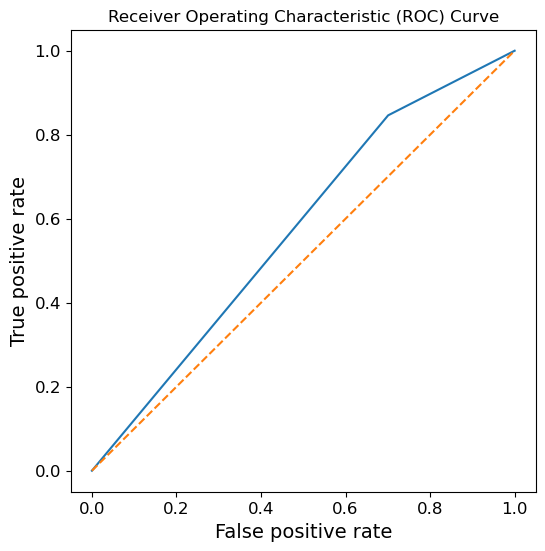

In [138]:
# use the roc_curve class to calculate the necessary values
fper, tper, thresholds = roc_curve(y_test, probs_pi)
# the plotting
plt.figure(figsize=(6,6))
plt.plot(fper, tper)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [139]:
# area under the curve
roc_auc_score(y_test, probs_pi)

0.5726981351981352

# 'Intensive_english_centre' preprocessing 

In [140]:
data_for_preprocessing = new_data[['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Latitude', 'Longitude', 'Opportunity_class']].copy()

In [141]:
data_for_preprocessing.reset_index(drop=True, inplace=True)
data_for_preprocessing.head()

,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Level_of_schooling,Selective_school,School_specialty_type,School_subtype,Preschool_ind,Distance_education,Intensive_english_centre,School_gender,Late_opening_school,ASGS_remoteness,Latitude,Longitude,Opportunity_class
0,295.0,13.0,3.0,948.0,2,1,1,5,0,1,0,1,N,1,-32.933094,151.594552,0
1,48.0,17.0,0.0,978.0,2,1,1,5,0,1,0,1,N,2,-31.971159,151.911058,0
2,524.0,28.0,6.0,905.0,2,1,1,5,1,1,0,1,N,0,-35.700051,150.188373,0
3,477.0,12.0,14.0,999.0,2,1,1,5,0,1,0,1,N,0,-33.420942,149.570615,0
4,162.0,4.0,29.0,1001.0,2,1,1,5,0,1,0,1,N,2,-34.252836,146.101067,0


In [142]:
#create data frame for dummies
data_drop_for_dummies = data_for_preprocessing.drop(['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Opportunity_class'], axis=1)

In [143]:
categorical_columns = ['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Opportunity_class' , 'Distance_education' , 'School_gender', 'Late_opening_school', 'ASGS_remoteness']

In [144]:
dummies = pd.get_dummies(data_for_preprocessing, columns=categorical_columns)

In [145]:
dummies = dummies.drop(['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Latitude', 'Longitude', 'Intensive_english_centre'], axis=1)

In [146]:
X = pd.concat([data_drop_for_dummies, dummies], axis=1)
y = data_for_preprocessing['Intensive_english_centre']

In [147]:
y = y.replace({'Y': 1, 'N': 0})

In [148]:
X['Indigenous_pct'] = X['Indigenous_pct'].astype(float)
X['LBOTE_pct'] = X['LBOTE_pct'].astype(float)

# Naive Bayes for 'Intensive_english_centre' 

In [149]:
#data splitting: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
#Model Building and Training Data
model_iec = GaussianNB()
model_iec.fit(X_train, y_train)

GaussianNB()

In [151]:
#accuracy of the training data
model_iec.score(X_train, y_train)

0.9106498194945848

In [152]:
#accuracy of the test data
model_iec.score(X_test, y_test)

0.8916967509025271

In [153]:
#predictions
y_pred_iec = model_iec.predict(X_test)
y_pred_iec

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [154]:
model_iec_acc_score = accuracy_score(y_pred_los, y_test)
f1_score_iec = f1_score(y_pred_iec, y_test, average="weighted")

print("Model Accuracy: ", model_iec_acc_score)
print("Model F1 score: ", f1_score_iec)

Model Accuracy:  0.6570397111913358
Model F1 score:  0.8470400378979694


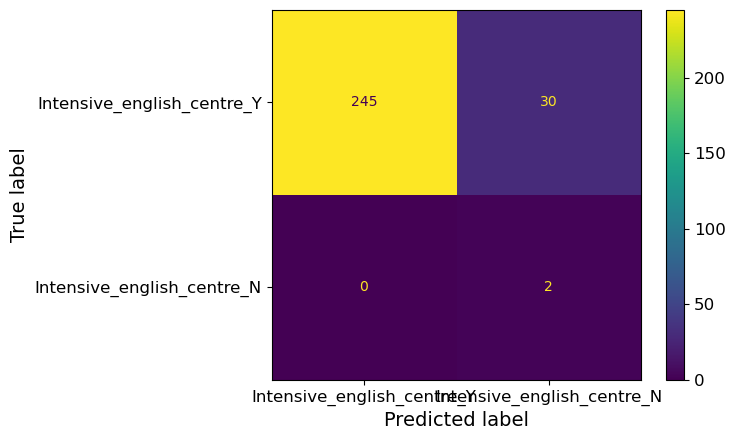

In [155]:
#confusion matrix
labels = ['Intensive_english_centre_Y', 'Intensive_english_centre_N']
cm_iec = confusion_matrix(y_test, y_pred_iec)
display = ConfusionMatrixDisplay(confusion_matrix=cm_iec, display_labels=labels)
display.plot();

In [156]:
print(classification_report(y_test, y_pred_iec))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       275
           1       0.06      1.00      0.12         2

    accuracy                           0.89       277
   macro avg       0.53      0.95      0.53       277
weighted avg       0.99      0.89      0.94       277



In [157]:
#Cross Validation Accuracy of the data set
cross_val_score(GaussianNB(), X_train, y_train, cv=5)

array([0.91441441, 0.91891892, 0.9009009 , 0.93665158, 0.90045249])

In [158]:
#ROC Curves
y_pred_prob_iec = model_iec.predict_proba(X_test)
y_pred_prob_iec

array([[9.03217244e-045, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.0

In [159]:
# class 'Y' as the positives
probs_iec = y_pred_prob_iec[:,1] 
probs_iec

array([1.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 1

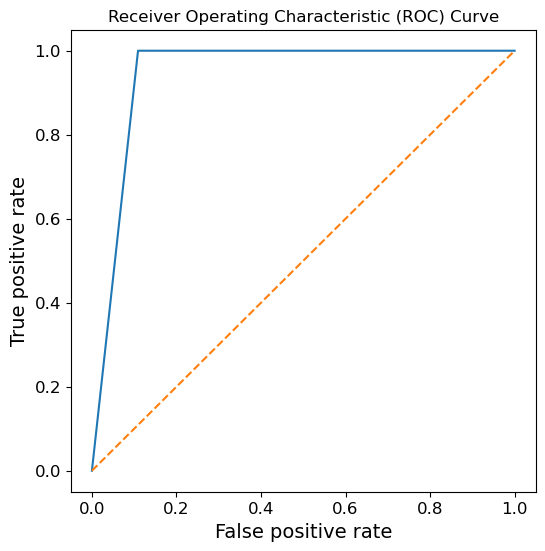

In [160]:
#roc_curve class to calculate the necessary values
fper, tper, thresholds = roc_curve(y_test, probs_iec)
# the plotting
plt.figure(figsize=(6,6))
plt.plot(fper, tper)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [161]:
# area under the curve
roc_auc_score(y_test, probs_iec)

0.9454545454545454